# Convergence test state prep and measurement

1. Running a single qubit and measuring.
2. Increase the number of shots
3. Examine expected value

In [8]:
from pytket.extensions.nexus import Nexus, QuantinuumConfig
#from pytket.extensions.quantinuum import QuantinuumBackend
from pytket.extensions.nexus.backends import NexusBackend
from pytket.backends.resulthandle import ResultHandle
from pytket import Circuit
from pytket.unit_id import BitRegister
from pytket.circuit.display import render_circuit_jupyter
import networkx as nx
import matplotlib.pyplot as plt
import math as ma 
import numpy as np
import random as rm
import pandas as pd
import re
import copy
import warnings
import sympy as sy
import itertools
import ast

import sys
sys.path.append('/home/jovyan/BenchmarkingQuantinuumH1/src')



In [9]:
import helper_functions as hf
import circuits_version_02 as cv2

In [36]:
#my_new_quantinuum_exp = Nexus().get_project_by_name("UBQC")
#configuration = QuantinuumConfig(device_name="H1-1E", user_group="Default")
#backend = QuantinuumBackend(configuration, my_new_quantinuum_exp)

my_new_quantinuum_exp = Nexus().get_project_by_name("UBQC")
configuration = QuantinuumConfig(device_name="H1-1", user_group="Default")
backend = NexusBackend(configuration, my_new_quantinuum_exp)

#from pytket.extensions.quantinuum import QuantinuumBackend, QuantinuumAPIOffline
#api_offline = QuantinuumAPIOffline()
#backend = QuantinuumBackend(device_name="H1-1LE", api_handler = api_offline)


Started using project with name: UBQC


In [14]:
n_shots = 1

In [17]:
circuit = cv2.circuit_01()
backend.default_compilation_pass().apply(circuit)
handle = backend.process_circuit(circuit, n_shots=n_shots)
result = backend.get_result(handle)

In [37]:
circuit = cv2.circuit_01()
compiled_circuit = backend.get_compiled_circuit(circuit)
backend.cost(compiled_circuit,n_shots = 10)

RuntimeError: compile-job-adnate-tall-pious-atramentaria: Circuit has encountered an error during compilation.
CompileJobItem 0: <class 'pytket.extensions.quantinuum.backends.quantinuum.DeviceNotAvailable'>: H1-1

In [51]:
handle = [ResultHandle.from_str(l) for l in lines]
dist = [backend.get_result(h) for h in handle]
res = [append_missing_for_single_qubit_outcome(d) for d in dist]
expectation = [r[(0,)] - r[(1,)] for r in res]

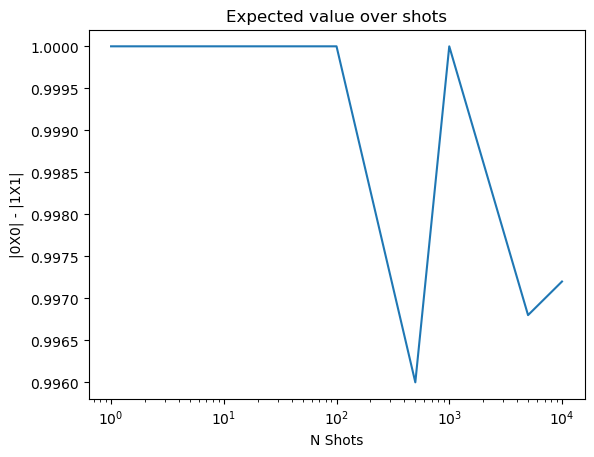

In [52]:
import matplotlib.pyplot as plt

# Data
x = n_shots
y = expectation
# Create a line plot
plt.plot(x, y)
plt.xscale('log')
# Add labels and title
plt.xlabel('N Shots')
plt.ylabel('|0X0| - |1X1|')
plt.title('Expected value over shots')

# Show the plot
plt.savefig('expectation_over_shots.png')
plt.show()





In [49]:
max(expectation) - min(expectation)

0.0040000000000000036

In [11]:
def append_missing_for_single_qubit_outcome(result):
    if (0,) in list(result.get_counts().keys()) and (1,) in list(result.get_counts().keys()):
        return result.get_distribution()
    elif (0,) in list(result.get_counts().keys()) and not (1,) in list(result.get_counts().keys()):
        res = result.get_distribution()
        res[(1,)] = 0.0
        return res
    elif not (0,) in list(result.get_counts().keys()) and (1,) in list(result.get_counts().keys()):
        res = result.get_distribution()
        res[(0,)] = 0.0
        return res
    elif not (0,) in list(result.get_counts().keys()) and not (1,) in list(result.get_counts().keys()):
        raise ValueError("No (0,) nor (1,)")
    else:
        raise ValueError("Outcome indices not correct check")